# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

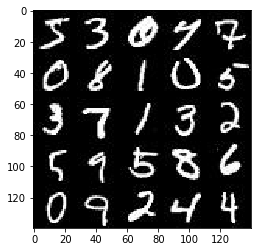

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

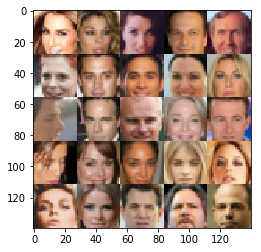

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0-rc0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = "input_real")
    inputs_fake = tf.placeholder(tf.float32, (None, z_dim), name = "input_fake")
    learning_rate = tf.placeholder(tf.float32, name = "learning_rate")

    return inputs_real, inputs_fake, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "d:\\Users\\XX\\Anaconda2\\envs\\gpu-env-tf\\lib\\runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "d:\\Users\\XX\\Anaconda2\\envs\\gpu-env-tf\\lib\\runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "d:\\Users\\XX\\Anaconda2\\envs\\gpu-env-tf\\lib\\site-packages\\ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "d:\\Users\\XX\\Anaconda2\\envs\\gpu-env-tf\\lib\\site-packages\\traitlets\\config\\application.py", line 658, in launch_instance\n    app.start()', 'File "d:\\Users\\XX\\Anaconda2\\envs\\gpu-env-tf\\lib\\site-packages\\ipykernel\\kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [13]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        
        # conv1 out 14 14
        x1 = tf.layers.conv2d(images, 128, 5, strides = 2, padding = 'same')
        x1 = tf.maximum(alpha * x1, x1)
    
        # conv2 out 7 7
        x2 = tf.layers.conv2d(x1, 256, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = True)
        x2 = tf.maximum(alpha * x2, x2)

        x3 = tf.reshape(x2, (-1, 7 * 7 * 256))
        logits = tf.contrib.layers.fully_connected(x3, 1, activation_fn = None)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [15]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    if is_train == True:
        reuse = False
    else:
        reuse = True
    with tf.variable_scope('generator', reuse = reuse):
        alpha = 0.2
        # First fully connected layer
        x1 = tf.contrib.layers.fully_connected(z, 7 * 7 * 512, activation_fn = None)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training = is_train)
        x1 = tf.maximum(alpha * x1, x1)
        
        # conv1 14 14 256
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides = 2, padding = 'same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        # conv1 14 14 128
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides = 1, padding = 'same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3)

        # Output layer, 28x28x3
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides = 2, padding = 'same')
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [16]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, labels=tf.ones_like(d_model_real)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [17]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [21]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #tf.reset_default_graph()
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps = steps + 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # batch_images 为 -0.5 到 0.5
                batch_images = batch_images * 2
                
                sess.run(d_train_opt, feed_dict = {input_real:batch_images, input_z:batch_z, lr:learning_rate})
                sess.run(g_train_opt, feed_dict = {input_z:batch_z, input_real:batch_images, lr:learning_rate})
#                sess.run(g_train_opt, feed_dict = {input_z:batch_z, input_real:batch_images, lr:learning_rate})

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 9, input_z, data_shape[3], data_image_mode)
                    steps = 1

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

In [12]:
batch_size = 512
z_dim = 512
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

Epoch 1/2... Discriminator Loss: 0.4409... Generator Loss: 1.8052
Epoch 1/2... Discriminator Loss: 0.0997... Generator Loss: 3.8535


KeyboardInterrupt: 

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/10... Discriminator Loss: 2.9944... Generator Loss: 0.1228
Epoch 1/10... Discriminator Loss: 1.2732... Generator Loss: 0.7208
Epoch 1/10... Discriminator Loss: 1.3018... Generator Loss: 1.0269
Epoch 1/10... Discriminator Loss: 1.2235... Generator Loss: 0.8760
Epoch 1/10... Discriminator Loss: 1.3415... Generator Loss: 1.2140
Epoch 1/10... Discriminator Loss: 1.8344... Generator Loss: 0.4306
Epoch 1/10... Discriminator Loss: 1.8293... Generator Loss: 0.4972
Epoch 1/10... Discriminator Loss: 1.5076... Generator Loss: 0.6374
Epoch 1/10... Discriminator Loss: 1.7672... Generator Loss: 0.4934
Epoch 1/10... Discriminator Loss: 1.5477... Generator Loss: 0.6125


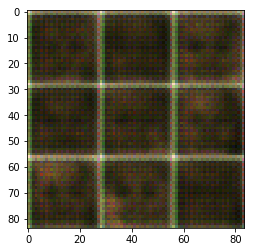

Epoch 1/10... Discriminator Loss: 1.0815... Generator Loss: 0.8814
Epoch 1/10... Discriminator Loss: 2.1132... Generator Loss: 0.4326
Epoch 1/10... Discriminator Loss: 1.8392... Generator Loss: 0.7123
Epoch 1/10... Discriminator Loss: 1.4949... Generator Loss: 0.5525
Epoch 1/10... Discriminator Loss: 0.9204... Generator Loss: 0.9222
Epoch 1/10... Discriminator Loss: 1.6472... Generator Loss: 0.5714
Epoch 1/10... Discriminator Loss: 1.4648... Generator Loss: 0.7907
Epoch 1/10... Discriminator Loss: 2.2125... Generator Loss: 0.3141
Epoch 1/10... Discriminator Loss: 1.5823... Generator Loss: 0.4388
Epoch 1/10... Discriminator Loss: 1.4331... Generator Loss: 0.6354


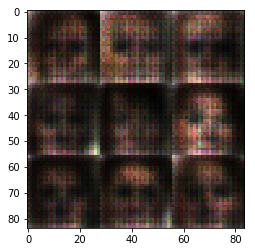

Epoch 1/10... Discriminator Loss: 1.5015... Generator Loss: 0.6300
Epoch 1/10... Discriminator Loss: 1.2379... Generator Loss: 0.6676
Epoch 1/10... Discriminator Loss: 1.2347... Generator Loss: 0.7291
Epoch 1/10... Discriminator Loss: 1.3685... Generator Loss: 0.7192
Epoch 1/10... Discriminator Loss: 1.3618... Generator Loss: 0.6716
Epoch 1/10... Discriminator Loss: 1.3548... Generator Loss: 0.7155
Epoch 1/10... Discriminator Loss: 1.4742... Generator Loss: 0.7719
Epoch 1/10... Discriminator Loss: 1.3095... Generator Loss: 0.8253
Epoch 1/10... Discriminator Loss: 1.3051... Generator Loss: 0.5783
Epoch 1/10... Discriminator Loss: 1.1133... Generator Loss: 0.9488


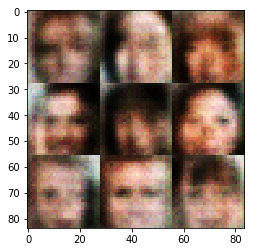

Epoch 1/10... Discriminator Loss: 1.2734... Generator Loss: 1.3582
Epoch 1/10... Discriminator Loss: 1.0608... Generator Loss: 0.8032
Epoch 1/10... Discriminator Loss: 0.9825... Generator Loss: 0.8616
Epoch 1/10... Discriminator Loss: 1.1840... Generator Loss: 1.5549
Epoch 1/10... Discriminator Loss: 0.9823... Generator Loss: 1.7337
Epoch 1/10... Discriminator Loss: 1.3579... Generator Loss: 2.3211
Epoch 1/10... Discriminator Loss: 1.6711... Generator Loss: 0.2974
Epoch 1/10... Discriminator Loss: 0.9707... Generator Loss: 1.6151
Epoch 1/10... Discriminator Loss: 1.5660... Generator Loss: 0.3697
Epoch 1/10... Discriminator Loss: 0.6601... Generator Loss: 1.2899


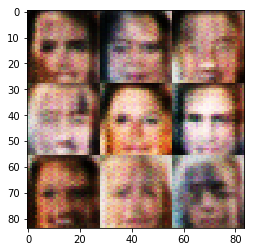

Epoch 1/10... Discriminator Loss: 1.1216... Generator Loss: 0.5785
Epoch 1/10... Discriminator Loss: 1.2888... Generator Loss: 0.4972
Epoch 1/10... Discriminator Loss: 0.8597... Generator Loss: 1.4137
Epoch 1/10... Discriminator Loss: 0.9668... Generator Loss: 0.7838
Epoch 1/10... Discriminator Loss: 1.2385... Generator Loss: 2.3853
Epoch 1/10... Discriminator Loss: 0.6054... Generator Loss: 1.1532
Epoch 1/10... Discriminator Loss: 1.0846... Generator Loss: 1.2275
Epoch 1/10... Discriminator Loss: 2.1565... Generator Loss: 0.1755
Epoch 1/10... Discriminator Loss: 1.0349... Generator Loss: 0.9609
Epoch 1/10... Discriminator Loss: 1.6508... Generator Loss: 0.2748


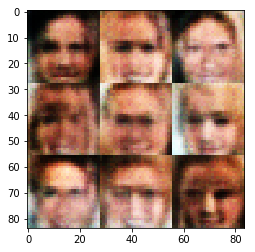

Epoch 1/10... Discriminator Loss: 0.4846... Generator Loss: 3.1106
Epoch 1/10... Discriminator Loss: 1.6452... Generator Loss: 0.2742
Epoch 1/10... Discriminator Loss: 1.9626... Generator Loss: 0.1985
Epoch 1/10... Discriminator Loss: 0.8481... Generator Loss: 2.1195
Epoch 1/10... Discriminator Loss: 0.8949... Generator Loss: 1.5279
Epoch 1/10... Discriminator Loss: 1.2206... Generator Loss: 2.4751
Epoch 1/10... Discriminator Loss: 1.1394... Generator Loss: 1.5500
Epoch 1/10... Discriminator Loss: 0.7539... Generator Loss: 1.0005
Epoch 1/10... Discriminator Loss: 0.4364... Generator Loss: 1.7559
Epoch 1/10... Discriminator Loss: 0.8365... Generator Loss: 0.9934


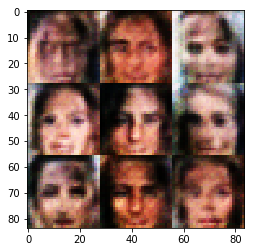

Epoch 1/10... Discriminator Loss: 0.4934... Generator Loss: 1.4803
Epoch 1/10... Discriminator Loss: 0.8996... Generator Loss: 0.8868
Epoch 1/10... Discriminator Loss: 1.5639... Generator Loss: 1.2064
Epoch 1/10... Discriminator Loss: 1.2026... Generator Loss: 0.6447
Epoch 1/10... Discriminator Loss: 1.0871... Generator Loss: 0.8922
Epoch 1/10... Discriminator Loss: 0.8867... Generator Loss: 1.0540
Epoch 1/10... Discriminator Loss: 0.3433... Generator Loss: 2.2657
Epoch 1/10... Discriminator Loss: 1.0203... Generator Loss: 1.6736
Epoch 1/10... Discriminator Loss: 1.2323... Generator Loss: 1.0102
Epoch 1/10... Discriminator Loss: 1.2255... Generator Loss: 0.9427


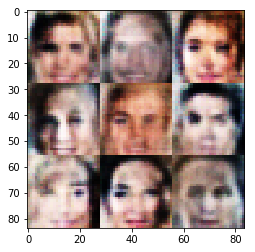

Epoch 1/10... Discriminator Loss: 0.7597... Generator Loss: 1.1501
Epoch 1/10... Discriminator Loss: 0.8823... Generator Loss: 1.5990
Epoch 1/10... Discriminator Loss: 1.0131... Generator Loss: 0.8505
Epoch 1/10... Discriminator Loss: 1.4153... Generator Loss: 0.4500
Epoch 1/10... Discriminator Loss: 1.2380... Generator Loss: 0.9861
Epoch 1/10... Discriminator Loss: 1.2800... Generator Loss: 0.7922
Epoch 1/10... Discriminator Loss: 1.4349... Generator Loss: 0.4071
Epoch 1/10... Discriminator Loss: 1.2328... Generator Loss: 1.0585
Epoch 1/10... Discriminator Loss: 1.1572... Generator Loss: 1.4028
Epoch 1/10... Discriminator Loss: 1.4913... Generator Loss: 1.6642


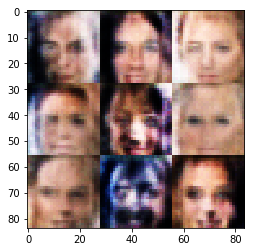

Epoch 1/10... Discriminator Loss: 1.0524... Generator Loss: 1.1555
Epoch 1/10... Discriminator Loss: 1.1823... Generator Loss: 0.9217
Epoch 1/10... Discriminator Loss: 1.5371... Generator Loss: 0.3945
Epoch 1/10... Discriminator Loss: 1.4169... Generator Loss: 0.4133
Epoch 1/10... Discriminator Loss: 0.9529... Generator Loss: 1.1583
Epoch 1/10... Discriminator Loss: 0.7871... Generator Loss: 1.5922
Epoch 1/10... Discriminator Loss: 0.8364... Generator Loss: 1.2390
Epoch 1/10... Discriminator Loss: 1.2604... Generator Loss: 0.4939
Epoch 1/10... Discriminator Loss: 0.9519... Generator Loss: 1.1505
Epoch 1/10... Discriminator Loss: 1.0537... Generator Loss: 1.3623


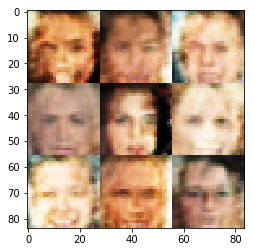

Epoch 1/10... Discriminator Loss: 1.2672... Generator Loss: 1.1048
Epoch 1/10... Discriminator Loss: 1.2424... Generator Loss: 0.4601
Epoch 1/10... Discriminator Loss: 0.7163... Generator Loss: 1.3081
Epoch 1/10... Discriminator Loss: 1.0567... Generator Loss: 0.7005
Epoch 1/10... Discriminator Loss: 1.1457... Generator Loss: 0.6872
Epoch 1/10... Discriminator Loss: 1.1880... Generator Loss: 0.6258
Epoch 1/10... Discriminator Loss: 0.5774... Generator Loss: 1.6769
Epoch 1/10... Discriminator Loss: 1.2019... Generator Loss: 1.4402
Epoch 1/10... Discriminator Loss: 0.9549... Generator Loss: 1.4047
Epoch 1/10... Discriminator Loss: 1.7498... Generator Loss: 0.3342


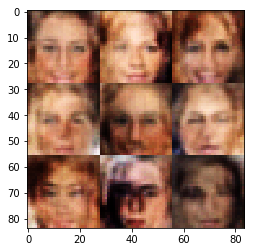

Epoch 1/10... Discriminator Loss: 1.1409... Generator Loss: 0.8500
Epoch 1/10... Discriminator Loss: 1.1848... Generator Loss: 0.7448
Epoch 1/10... Discriminator Loss: 1.0714... Generator Loss: 0.7397
Epoch 1/10... Discriminator Loss: 0.8467... Generator Loss: 1.1925
Epoch 1/10... Discriminator Loss: 0.6457... Generator Loss: 2.6067
Epoch 1/10... Discriminator Loss: 1.0471... Generator Loss: 0.8849
Epoch 1/10... Discriminator Loss: 1.0864... Generator Loss: 0.7369
Epoch 1/10... Discriminator Loss: 0.7797... Generator Loss: 1.7445
Epoch 1/10... Discriminator Loss: 0.7158... Generator Loss: 1.2732
Epoch 1/10... Discriminator Loss: 1.1953... Generator Loss: 0.6703


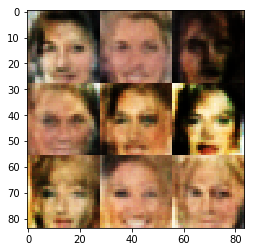

Epoch 1/10... Discriminator Loss: 1.0143... Generator Loss: 0.9183
Epoch 1/10... Discriminator Loss: 0.7984... Generator Loss: 1.4014
Epoch 1/10... Discriminator Loss: 1.1001... Generator Loss: 1.6688
Epoch 1/10... Discriminator Loss: 1.0386... Generator Loss: 2.2245
Epoch 1/10... Discriminator Loss: 0.9863... Generator Loss: 1.6162
Epoch 1/10... Discriminator Loss: 0.9861... Generator Loss: 1.1808
Epoch 1/10... Discriminator Loss: 1.0915... Generator Loss: 0.6735
Epoch 1/10... Discriminator Loss: 1.2982... Generator Loss: 0.4632
Epoch 1/10... Discriminator Loss: 1.0585... Generator Loss: 0.6652
Epoch 1/10... Discriminator Loss: 1.1667... Generator Loss: 1.6030


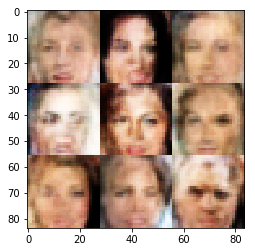

Epoch 1/10... Discriminator Loss: 1.1319... Generator Loss: 0.5391
Epoch 1/10... Discriminator Loss: 0.9663... Generator Loss: 0.8711
Epoch 1/10... Discriminator Loss: 1.2434... Generator Loss: 0.4785
Epoch 1/10... Discriminator Loss: 0.6741... Generator Loss: 1.5612
Epoch 1/10... Discriminator Loss: 0.7202... Generator Loss: 1.2934
Epoch 1/10... Discriminator Loss: 0.8295... Generator Loss: 2.4621
Epoch 1/10... Discriminator Loss: 1.0492... Generator Loss: 0.7265
Epoch 1/10... Discriminator Loss: 0.9390... Generator Loss: 1.8264
Epoch 1/10... Discriminator Loss: 1.2323... Generator Loss: 2.1966
Epoch 1/10... Discriminator Loss: 1.1512... Generator Loss: 0.9977


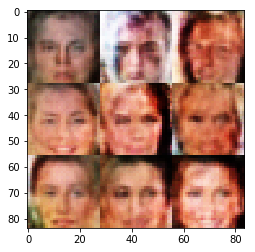

Epoch 1/10... Discriminator Loss: 0.9873... Generator Loss: 0.9548
Epoch 1/10... Discriminator Loss: 1.2476... Generator Loss: 0.4905
Epoch 1/10... Discriminator Loss: 0.6993... Generator Loss: 1.6666
Epoch 1/10... Discriminator Loss: 1.1461... Generator Loss: 0.8466
Epoch 1/10... Discriminator Loss: 0.9043... Generator Loss: 0.9423
Epoch 1/10... Discriminator Loss: 0.8951... Generator Loss: 1.4149
Epoch 1/10... Discriminator Loss: 0.5890... Generator Loss: 1.9872
Epoch 1/10... Discriminator Loss: 0.5775... Generator Loss: 1.5320
Epoch 1/10... Discriminator Loss: 0.7539... Generator Loss: 1.1721
Epoch 1/10... Discriminator Loss: 0.8512... Generator Loss: 1.6237


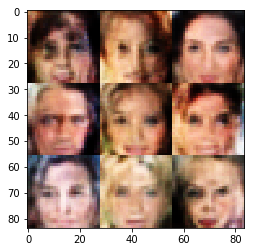

Epoch 1/10... Discriminator Loss: 1.9890... Generator Loss: 0.1899
Epoch 1/10... Discriminator Loss: 0.7167... Generator Loss: 1.9433
Epoch 1/10... Discriminator Loss: 1.0798... Generator Loss: 0.6296
Epoch 1/10... Discriminator Loss: 0.8005... Generator Loss: 1.3878
Epoch 1/10... Discriminator Loss: 1.0853... Generator Loss: 0.6640
Epoch 1/10... Discriminator Loss: 1.0328... Generator Loss: 1.1900
Epoch 1/10... Discriminator Loss: 0.8989... Generator Loss: 0.9115
Epoch 1/10... Discriminator Loss: 0.9765... Generator Loss: 2.5112
Epoch 1/10... Discriminator Loss: 0.8110... Generator Loss: 1.3553
Epoch 1/10... Discriminator Loss: 1.0327... Generator Loss: 0.6886


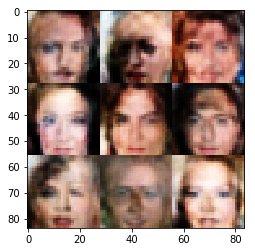

Epoch 1/10... Discriminator Loss: 1.3354... Generator Loss: 0.4141
Epoch 1/10... Discriminator Loss: 0.5046... Generator Loss: 3.1761
Epoch 1/10... Discriminator Loss: 0.6210... Generator Loss: 2.3060
Epoch 1/10... Discriminator Loss: 0.8734... Generator Loss: 2.0241
Epoch 1/10... Discriminator Loss: 0.7578... Generator Loss: 1.5437
Epoch 1/10... Discriminator Loss: 0.7007... Generator Loss: 1.3351
Epoch 1/10... Discriminator Loss: 1.5539... Generator Loss: 0.3173
Epoch 1/10... Discriminator Loss: 0.8712... Generator Loss: 1.4843
Epoch 1/10... Discriminator Loss: 0.5864... Generator Loss: 1.4745
Epoch 1/10... Discriminator Loss: 1.2132... Generator Loss: 0.4907


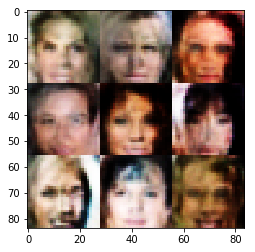

Epoch 1/10... Discriminator Loss: 0.8459... Generator Loss: 0.9791
Epoch 1/10... Discriminator Loss: 1.0394... Generator Loss: 2.8355
Epoch 1/10... Discriminator Loss: 0.8105... Generator Loss: 0.9488
Epoch 1/10... Discriminator Loss: 0.6769... Generator Loss: 2.8789
Epoch 1/10... Discriminator Loss: 0.5609... Generator Loss: 3.3624
Epoch 1/10... Discriminator Loss: 0.6657... Generator Loss: 3.1723
Epoch 1/10... Discriminator Loss: 0.9993... Generator Loss: 0.6896
Epoch 1/10... Discriminator Loss: 0.4929... Generator Loss: 2.2913
Epoch 1/10... Discriminator Loss: 1.3977... Generator Loss: 0.4535
Epoch 1/10... Discriminator Loss: 0.6236... Generator Loss: 1.5118


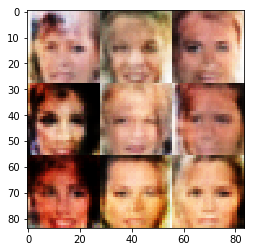

Epoch 1/10... Discriminator Loss: 0.7597... Generator Loss: 1.4085
Epoch 1/10... Discriminator Loss: 0.9711... Generator Loss: 1.5675
Epoch 1/10... Discriminator Loss: 0.7767... Generator Loss: 1.6933
Epoch 1/10... Discriminator Loss: 0.5640... Generator Loss: 1.8917
Epoch 1/10... Discriminator Loss: 0.6610... Generator Loss: 1.3205
Epoch 1/10... Discriminator Loss: 0.8129... Generator Loss: 1.0398
Epoch 1/10... Discriminator Loss: 1.2419... Generator Loss: 0.5087
Epoch 1/10... Discriminator Loss: 0.5706... Generator Loss: 1.5598
Epoch 1/10... Discriminator Loss: 0.6095... Generator Loss: 2.1081
Epoch 1/10... Discriminator Loss: 1.0246... Generator Loss: 0.7453


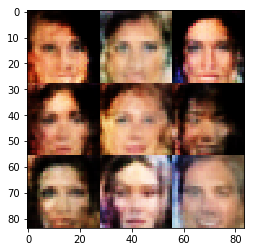

Epoch 1/10... Discriminator Loss: 0.8912... Generator Loss: 1.3097
Epoch 1/10... Discriminator Loss: 0.6238... Generator Loss: 1.8171
Epoch 1/10... Discriminator Loss: 0.6373... Generator Loss: 2.6707
Epoch 1/10... Discriminator Loss: 0.6157... Generator Loss: 1.5176
Epoch 1/10... Discriminator Loss: 0.7691... Generator Loss: 1.6752
Epoch 1/10... Discriminator Loss: 0.9574... Generator Loss: 0.7379
Epoch 1/10... Discriminator Loss: 0.5123... Generator Loss: 1.9561
Epoch 1/10... Discriminator Loss: 0.8049... Generator Loss: 0.9069
Epoch 1/10... Discriminator Loss: 0.8591... Generator Loss: 0.8418
Epoch 1/10... Discriminator Loss: 0.5452... Generator Loss: 1.6044


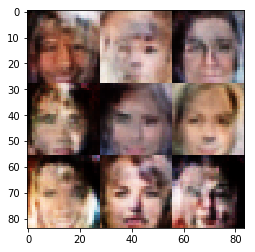

Epoch 1/10... Discriminator Loss: 0.4947... Generator Loss: 1.8101
Epoch 1/10... Discriminator Loss: 1.5663... Generator Loss: 0.3268
Epoch 1/10... Discriminator Loss: 0.7145... Generator Loss: 1.1671
Epoch 1/10... Discriminator Loss: 0.4876... Generator Loss: 2.3960
Epoch 1/10... Discriminator Loss: 0.7077... Generator Loss: 1.4407
Epoch 1/10... Discriminator Loss: 0.9637... Generator Loss: 0.8684
Epoch 1/10... Discriminator Loss: 0.5411... Generator Loss: 1.4010
Epoch 1/10... Discriminator Loss: 0.5878... Generator Loss: 3.1081
Epoch 1/10... Discriminator Loss: 0.4869... Generator Loss: 2.1826
Epoch 1/10... Discriminator Loss: 1.5967... Generator Loss: 0.3245


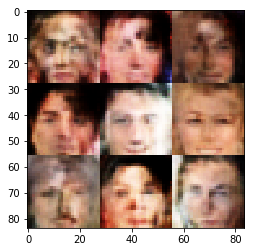

Epoch 1/10... Discriminator Loss: 0.3296... Generator Loss: 3.2248
Epoch 1/10... Discriminator Loss: 0.6868... Generator Loss: 1.7634
Epoch 1/10... Discriminator Loss: 1.3987... Generator Loss: 3.4298
Epoch 1/10... Discriminator Loss: 1.0843... Generator Loss: 0.8211
Epoch 1/10... Discriminator Loss: 0.5546... Generator Loss: 1.9927
Epoch 1/10... Discriminator Loss: 0.8788... Generator Loss: 1.6675
Epoch 1/10... Discriminator Loss: 0.7886... Generator Loss: 0.9763
Epoch 1/10... Discriminator Loss: 0.6012... Generator Loss: 2.2652
Epoch 1/10... Discriminator Loss: 0.7082... Generator Loss: 1.3956
Epoch 1/10... Discriminator Loss: 0.7465... Generator Loss: 1.0628


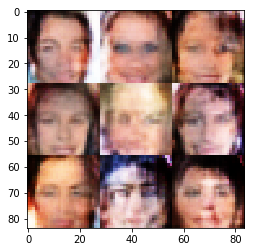

Epoch 1/10... Discriminator Loss: 0.8945... Generator Loss: 1.2344
Epoch 1/10... Discriminator Loss: 0.7177... Generator Loss: 1.5191
Epoch 1/10... Discriminator Loss: 0.8147... Generator Loss: 2.8451
Epoch 1/10... Discriminator Loss: 0.6683... Generator Loss: 1.7433
Epoch 1/10... Discriminator Loss: 0.7155... Generator Loss: 1.6160
Epoch 1/10... Discriminator Loss: 0.5753... Generator Loss: 1.9916
Epoch 1/10... Discriminator Loss: 1.1489... Generator Loss: 0.6101
Epoch 1/10... Discriminator Loss: 0.7650... Generator Loss: 1.8685
Epoch 1/10... Discriminator Loss: 0.3196... Generator Loss: 2.0250
Epoch 1/10... Discriminator Loss: 1.0891... Generator Loss: 0.7960


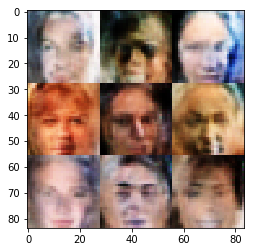

Epoch 1/10... Discriminator Loss: 0.6030... Generator Loss: 1.8450
Epoch 1/10... Discriminator Loss: 0.6486... Generator Loss: 1.8556
Epoch 1/10... Discriminator Loss: 0.3948... Generator Loss: 2.0309
Epoch 1/10... Discriminator Loss: 1.2262... Generator Loss: 0.5749
Epoch 1/10... Discriminator Loss: 0.5090... Generator Loss: 2.4421
Epoch 1/10... Discriminator Loss: 0.7943... Generator Loss: 1.2383
Epoch 1/10... Discriminator Loss: 0.4327... Generator Loss: 2.3691
Epoch 1/10... Discriminator Loss: 0.8521... Generator Loss: 0.9665
Epoch 1/10... Discriminator Loss: 1.0537... Generator Loss: 0.6678
Epoch 1/10... Discriminator Loss: 0.5732... Generator Loss: 2.2555


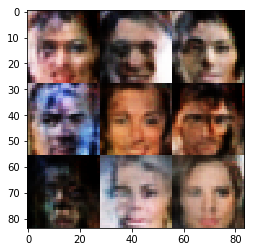

Epoch 1/10... Discriminator Loss: 0.7556... Generator Loss: 1.3446
Epoch 1/10... Discriminator Loss: 0.7710... Generator Loss: 1.3285
Epoch 1/10... Discriminator Loss: 0.7474... Generator Loss: 1.1297
Epoch 1/10... Discriminator Loss: 0.8143... Generator Loss: 1.3963
Epoch 1/10... Discriminator Loss: 0.4823... Generator Loss: 1.9109
Epoch 1/10... Discriminator Loss: 0.6719... Generator Loss: 1.6445
Epoch 1/10... Discriminator Loss: 0.3425... Generator Loss: 2.7741
Epoch 1/10... Discriminator Loss: 0.7395... Generator Loss: 1.0812
Epoch 1/10... Discriminator Loss: 0.5905... Generator Loss: 2.2042
Epoch 1/10... Discriminator Loss: 0.4140... Generator Loss: 2.2931


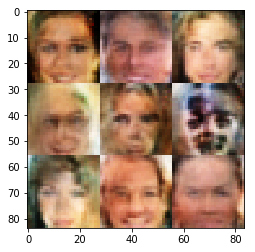

Epoch 1/10... Discriminator Loss: 0.6635... Generator Loss: 1.9039
Epoch 1/10... Discriminator Loss: 0.2928... Generator Loss: 3.3598
Epoch 1/10... Discriminator Loss: 0.7601... Generator Loss: 0.9007
Epoch 1/10... Discriminator Loss: 0.4184... Generator Loss: 2.8194
Epoch 1/10... Discriminator Loss: 0.8028... Generator Loss: 0.9674
Epoch 1/10... Discriminator Loss: 1.5392... Generator Loss: 2.4634
Epoch 1/10... Discriminator Loss: 1.0008... Generator Loss: 0.9256
Epoch 1/10... Discriminator Loss: 0.8807... Generator Loss: 0.7864
Epoch 1/10... Discriminator Loss: 0.7882... Generator Loss: 1.0186
Epoch 1/10... Discriminator Loss: 0.6327... Generator Loss: 2.0203


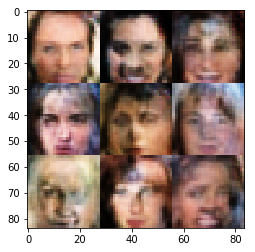

Epoch 1/10... Discriminator Loss: 0.7723... Generator Loss: 1.0747
Epoch 1/10... Discriminator Loss: 0.9654... Generator Loss: 1.3536
Epoch 1/10... Discriminator Loss: 0.6208... Generator Loss: 1.5119
Epoch 1/10... Discriminator Loss: 0.6980... Generator Loss: 2.1093
Epoch 1/10... Discriminator Loss: 0.8702... Generator Loss: 0.9096
Epoch 1/10... Discriminator Loss: 0.5881... Generator Loss: 1.3045
Epoch 1/10... Discriminator Loss: 0.4466... Generator Loss: 2.0837
Epoch 1/10... Discriminator Loss: 0.7236... Generator Loss: 1.2854
Epoch 1/10... Discriminator Loss: 0.5959... Generator Loss: 1.5901
Epoch 1/10... Discriminator Loss: 0.7278... Generator Loss: 1.7599


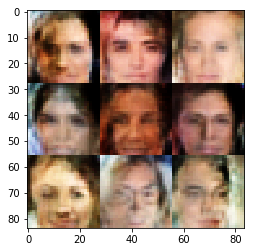

Epoch 1/10... Discriminator Loss: 0.7826... Generator Loss: 1.2536
Epoch 1/10... Discriminator Loss: 0.9514... Generator Loss: 1.2335
Epoch 1/10... Discriminator Loss: 1.0073... Generator Loss: 0.7284
Epoch 1/10... Discriminator Loss: 0.7755... Generator Loss: 0.9763
Epoch 1/10... Discriminator Loss: 1.0644... Generator Loss: 0.9019
Epoch 1/10... Discriminator Loss: 0.6475... Generator Loss: 1.6297
Epoch 1/10... Discriminator Loss: 0.5724... Generator Loss: 1.7333
Epoch 1/10... Discriminator Loss: 0.6933... Generator Loss: 1.5860
Epoch 1/10... Discriminator Loss: 1.1312... Generator Loss: 0.8282
Epoch 1/10... Discriminator Loss: 0.6659... Generator Loss: 1.5511


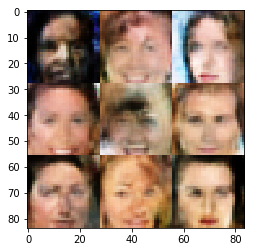

Epoch 1/10... Discriminator Loss: 0.6583... Generator Loss: 1.2998
Epoch 1/10... Discriminator Loss: 0.5527... Generator Loss: 1.8140
Epoch 1/10... Discriminator Loss: 0.8131... Generator Loss: 1.4816
Epoch 1/10... Discriminator Loss: 0.9328... Generator Loss: 0.7862
Epoch 1/10... Discriminator Loss: 0.6231... Generator Loss: 1.7324
Epoch 1/10... Discriminator Loss: 0.7723... Generator Loss: 1.0153
Epoch 1/10... Discriminator Loss: 0.3815... Generator Loss: 2.9606
Epoch 1/10... Discriminator Loss: 0.7678... Generator Loss: 1.4436
Epoch 1/10... Discriminator Loss: 0.6432... Generator Loss: 1.3940
Epoch 1/10... Discriminator Loss: 0.9226... Generator Loss: 0.9528


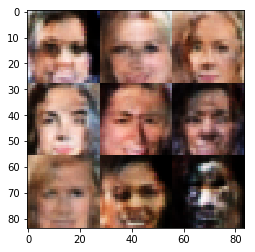

Epoch 1/10... Discriminator Loss: 1.1467... Generator Loss: 1.8863
Epoch 1/10... Discriminator Loss: 0.7339... Generator Loss: 1.4579
Epoch 1/10... Discriminator Loss: 0.7118... Generator Loss: 1.2000
Epoch 1/10... Discriminator Loss: 0.7565... Generator Loss: 1.4267
Epoch 1/10... Discriminator Loss: 0.9729... Generator Loss: 1.0278
Epoch 1/10... Discriminator Loss: 1.0333... Generator Loss: 1.0072
Epoch 1/10... Discriminator Loss: 0.4556... Generator Loss: 1.9471
Epoch 1/10... Discriminator Loss: 0.7623... Generator Loss: 1.6006
Epoch 1/10... Discriminator Loss: 1.1314... Generator Loss: 1.1072
Epoch 1/10... Discriminator Loss: 0.7756... Generator Loss: 1.3409


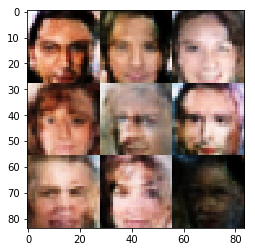

Epoch 1/10... Discriminator Loss: 0.8734... Generator Loss: 1.5763
Epoch 1/10... Discriminator Loss: 0.5999... Generator Loss: 1.6543
Epoch 1/10... Discriminator Loss: 0.8940... Generator Loss: 0.9235
Epoch 1/10... Discriminator Loss: 0.5565... Generator Loss: 1.8067
Epoch 1/10... Discriminator Loss: 0.8335... Generator Loss: 1.2214
Epoch 1/10... Discriminator Loss: 1.0268... Generator Loss: 0.7651
Epoch 1/10... Discriminator Loss: 0.4195... Generator Loss: 2.1586
Epoch 1/10... Discriminator Loss: 1.0253... Generator Loss: 0.7157
Epoch 1/10... Discriminator Loss: 0.9606... Generator Loss: 0.8314
Epoch 1/10... Discriminator Loss: 0.4708... Generator Loss: 2.1758


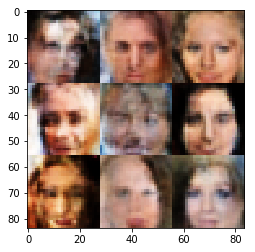

Epoch 1/10... Discriminator Loss: 0.6007... Generator Loss: 2.4424
Epoch 1/10... Discriminator Loss: 0.7082... Generator Loss: 1.3264
Epoch 1/10... Discriminator Loss: 0.6694... Generator Loss: 1.7837
Epoch 1/10... Discriminator Loss: 0.5328... Generator Loss: 2.2658
Epoch 1/10... Discriminator Loss: 0.6839... Generator Loss: 1.2710
Epoch 1/10... Discriminator Loss: 0.5096... Generator Loss: 1.6385
Epoch 1/10... Discriminator Loss: 0.6284... Generator Loss: 1.3863
Epoch 1/10... Discriminator Loss: 0.8097... Generator Loss: 2.5079
Epoch 1/10... Discriminator Loss: 0.7130... Generator Loss: 1.5869
Epoch 1/10... Discriminator Loss: 0.6697... Generator Loss: 3.1954


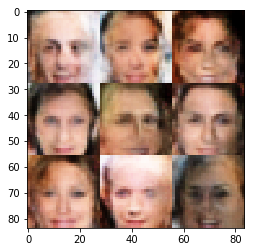

Epoch 1/10... Discriminator Loss: 0.5856... Generator Loss: 1.5825
Epoch 1/10... Discriminator Loss: 0.5366... Generator Loss: 2.1319
Epoch 1/10... Discriminator Loss: 0.7037... Generator Loss: 1.3629
Epoch 1/10... Discriminator Loss: 0.7495... Generator Loss: 1.2308
Epoch 1/10... Discriminator Loss: 0.6561... Generator Loss: 2.2034
Epoch 1/10... Discriminator Loss: 0.7002... Generator Loss: 1.4679
Epoch 1/10... Discriminator Loss: 0.7590... Generator Loss: 1.1548
Epoch 1/10... Discriminator Loss: 0.8412... Generator Loss: 1.2578
Epoch 1/10... Discriminator Loss: 0.7976... Generator Loss: 4.2249
Epoch 1/10... Discriminator Loss: 1.7359... Generator Loss: 0.2925


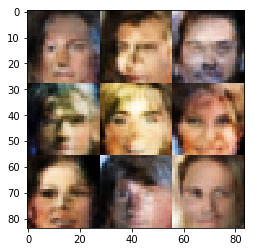

Epoch 1/10... Discriminator Loss: 1.0459... Generator Loss: 0.7609
Epoch 1/10... Discriminator Loss: 1.0985... Generator Loss: 0.6157
Epoch 1/10... Discriminator Loss: 0.9527... Generator Loss: 2.8376
Epoch 1/10... Discriminator Loss: 0.6276... Generator Loss: 2.5270
Epoch 1/10... Discriminator Loss: 1.0979... Generator Loss: 0.6085
Epoch 1/10... Discriminator Loss: 0.9034... Generator Loss: 1.1228
Epoch 1/10... Discriminator Loss: 0.7362... Generator Loss: 1.3862
Epoch 1/10... Discriminator Loss: 0.3890... Generator Loss: 3.8512
Epoch 1/10... Discriminator Loss: 0.8516... Generator Loss: 1.1283
Epoch 1/10... Discriminator Loss: 1.3579... Generator Loss: 0.3992


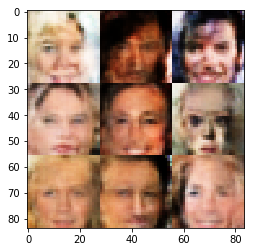

Epoch 1/10... Discriminator Loss: 0.6770... Generator Loss: 1.2695
Epoch 1/10... Discriminator Loss: 0.8319... Generator Loss: 0.9875
Epoch 1/10... Discriminator Loss: 0.6589... Generator Loss: 1.3275
Epoch 1/10... Discriminator Loss: 0.9458... Generator Loss: 0.7895
Epoch 1/10... Discriminator Loss: 0.8210... Generator Loss: 1.0152
Epoch 1/10... Discriminator Loss: 0.5143... Generator Loss: 1.9406
Epoch 1/10... Discriminator Loss: 1.1599... Generator Loss: 0.5395
Epoch 1/10... Discriminator Loss: 0.9668... Generator Loss: 1.2680
Epoch 1/10... Discriminator Loss: 0.7358... Generator Loss: 1.4212
Epoch 1/10... Discriminator Loss: 1.0294... Generator Loss: 0.7183


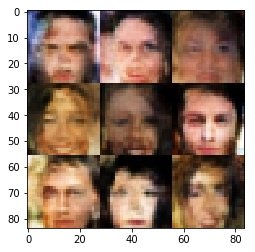

Epoch 1/10... Discriminator Loss: 0.9633... Generator Loss: 0.8316
Epoch 1/10... Discriminator Loss: 0.8073... Generator Loss: 1.1485
Epoch 1/10... Discriminator Loss: 1.2509... Generator Loss: 0.5187
Epoch 1/10... Discriminator Loss: 0.8691... Generator Loss: 0.8402
Epoch 1/10... Discriminator Loss: 0.7321... Generator Loss: 1.1638
Epoch 1/10... Discriminator Loss: 1.2093... Generator Loss: 0.5502
Epoch 1/10... Discriminator Loss: 0.8101... Generator Loss: 1.0732
Epoch 1/10... Discriminator Loss: 0.7938... Generator Loss: 2.0587
Epoch 1/10... Discriminator Loss: 0.8120... Generator Loss: 1.0095
Epoch 1/10... Discriminator Loss: 0.7477... Generator Loss: 1.8457


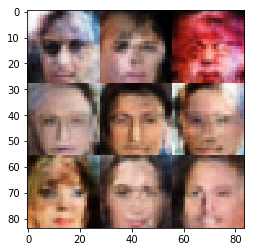

Epoch 1/10... Discriminator Loss: 0.8226... Generator Loss: 1.5994
Epoch 1/10... Discriminator Loss: 0.6225... Generator Loss: 1.8687
Epoch 1/10... Discriminator Loss: 0.9360... Generator Loss: 2.6751
Epoch 1/10... Discriminator Loss: 0.7606... Generator Loss: 1.7275
Epoch 1/10... Discriminator Loss: 0.8437... Generator Loss: 1.0036
Epoch 1/10... Discriminator Loss: 0.6709... Generator Loss: 1.8814
Epoch 1/10... Discriminator Loss: 0.8653... Generator Loss: 0.9189
Epoch 1/10... Discriminator Loss: 1.0025... Generator Loss: 1.1508
Epoch 1/10... Discriminator Loss: 0.9965... Generator Loss: 1.4652
Epoch 1/10... Discriminator Loss: 0.8818... Generator Loss: 1.0105


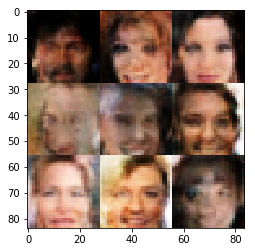

Epoch 1/10... Discriminator Loss: 0.9285... Generator Loss: 0.7346
Epoch 1/10... Discriminator Loss: 0.8966... Generator Loss: 1.0351
Epoch 1/10... Discriminator Loss: 0.9071... Generator Loss: 0.8118
Epoch 1/10... Discriminator Loss: 0.8916... Generator Loss: 1.0918
Epoch 1/10... Discriminator Loss: 0.9718... Generator Loss: 1.0404
Epoch 1/10... Discriminator Loss: 0.8816... Generator Loss: 1.0315
Epoch 1/10... Discriminator Loss: 0.9860... Generator Loss: 0.7797
Epoch 1/10... Discriminator Loss: 0.9759... Generator Loss: 1.9793
Epoch 1/10... Discriminator Loss: 1.1744... Generator Loss: 0.5963
Epoch 1/10... Discriminator Loss: 1.0621... Generator Loss: 1.3074


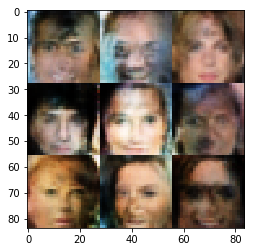

Epoch 1/10... Discriminator Loss: 0.9301... Generator Loss: 0.8682
Epoch 1/10... Discriminator Loss: 0.8073... Generator Loss: 1.3742
Epoch 1/10... Discriminator Loss: 1.0005... Generator Loss: 0.7575
Epoch 1/10... Discriminator Loss: 0.8109... Generator Loss: 2.0790
Epoch 1/10... Discriminator Loss: 0.8120... Generator Loss: 0.9325
Epoch 1/10... Discriminator Loss: 1.0061... Generator Loss: 1.0947
Epoch 1/10... Discriminator Loss: 0.9897... Generator Loss: 1.6464
Epoch 1/10... Discriminator Loss: 0.8611... Generator Loss: 0.9963
Epoch 1/10... Discriminator Loss: 0.7692... Generator Loss: 1.1953
Epoch 1/10... Discriminator Loss: 1.3431... Generator Loss: 0.5015


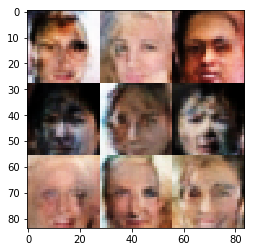

Epoch 1/10... Discriminator Loss: 0.7410... Generator Loss: 2.9347
Epoch 1/10... Discriminator Loss: 0.8478... Generator Loss: 1.1764
Epoch 1/10... Discriminator Loss: 0.7797... Generator Loss: 1.5799
Epoch 1/10... Discriminator Loss: 0.8379... Generator Loss: 1.0103
Epoch 1/10... Discriminator Loss: 0.8606... Generator Loss: 0.8386
Epoch 1/10... Discriminator Loss: 1.0853... Generator Loss: 0.8536
Epoch 1/10... Discriminator Loss: 0.7964... Generator Loss: 2.1406
Epoch 1/10... Discriminator Loss: 0.6944... Generator Loss: 1.6753
Epoch 1/10... Discriminator Loss: 1.1710... Generator Loss: 0.9333
Epoch 1/10... Discriminator Loss: 0.8864... Generator Loss: 0.8295


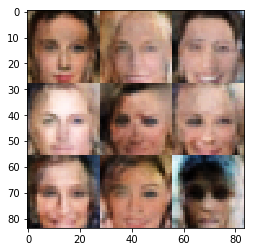

Epoch 1/10... Discriminator Loss: 1.0325... Generator Loss: 0.7460
Epoch 1/10... Discriminator Loss: 0.5597... Generator Loss: 1.3911
Epoch 1/10... Discriminator Loss: 0.7001... Generator Loss: 1.4432
Epoch 1/10... Discriminator Loss: 0.8832... Generator Loss: 1.1209
Epoch 1/10... Discriminator Loss: 1.1086... Generator Loss: 1.4282
Epoch 1/10... Discriminator Loss: 1.0090... Generator Loss: 1.3239
Epoch 1/10... Discriminator Loss: 0.9663... Generator Loss: 1.0556
Epoch 1/10... Discriminator Loss: 0.9081... Generator Loss: 1.4563
Epoch 1/10... Discriminator Loss: 0.7885... Generator Loss: 1.0335
Epoch 1/10... Discriminator Loss: 1.0982... Generator Loss: 0.6579


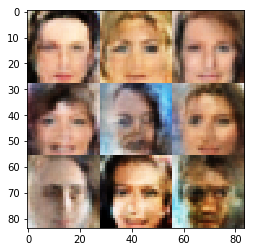

Epoch 1/10... Discriminator Loss: 1.0103... Generator Loss: 0.8067
Epoch 1/10... Discriminator Loss: 1.0549... Generator Loss: 1.1205
Epoch 1/10... Discriminator Loss: 0.9574... Generator Loss: 1.0896
Epoch 1/10... Discriminator Loss: 0.8417... Generator Loss: 0.9155
Epoch 1/10... Discriminator Loss: 0.8854... Generator Loss: 0.9197
Epoch 1/10... Discriminator Loss: 0.9440... Generator Loss: 0.8239
Epoch 1/10... Discriminator Loss: 1.0387... Generator Loss: 0.7379
Epoch 1/10... Discriminator Loss: 0.6510... Generator Loss: 1.9930
Epoch 1/10... Discriminator Loss: 0.6261... Generator Loss: 1.3004
Epoch 1/10... Discriminator Loss: 0.3487... Generator Loss: 3.7515


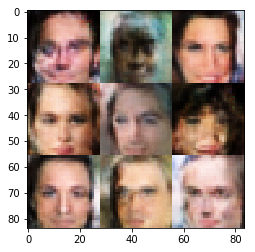

Epoch 1/10... Discriminator Loss: 1.8516... Generator Loss: 0.2778
Epoch 1/10... Discriminator Loss: 1.0208... Generator Loss: 1.4833
Epoch 1/10... Discriminator Loss: 0.9619... Generator Loss: 0.8749
Epoch 1/10... Discriminator Loss: 0.9612... Generator Loss: 1.3360
Epoch 1/10... Discriminator Loss: 1.1391... Generator Loss: 0.8321
Epoch 1/10... Discriminator Loss: 0.7093... Generator Loss: 2.2633
Epoch 1/10... Discriminator Loss: 0.9999... Generator Loss: 0.8660
Epoch 1/10... Discriminator Loss: 0.8504... Generator Loss: 0.8647
Epoch 1/10... Discriminator Loss: 1.0031... Generator Loss: 0.7259
Epoch 1/10... Discriminator Loss: 0.7579... Generator Loss: 1.3990


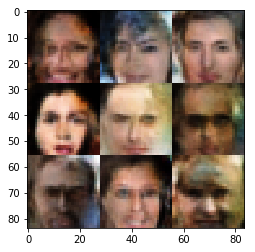

Epoch 1/10... Discriminator Loss: 0.6665... Generator Loss: 2.3061
Epoch 1/10... Discriminator Loss: 0.8344... Generator Loss: 1.1246
Epoch 1/10... Discriminator Loss: 0.8375... Generator Loss: 1.3632
Epoch 1/10... Discriminator Loss: 0.6519... Generator Loss: 1.2873
Epoch 1/10... Discriminator Loss: 0.8554... Generator Loss: 0.9153
Epoch 1/10... Discriminator Loss: 0.9768... Generator Loss: 1.2452
Epoch 1/10... Discriminator Loss: 1.0662... Generator Loss: 0.6110
Epoch 1/10... Discriminator Loss: 0.9090... Generator Loss: 0.8688
Epoch 1/10... Discriminator Loss: 0.8610... Generator Loss: 1.4892
Epoch 1/10... Discriminator Loss: 0.8240... Generator Loss: 0.9748


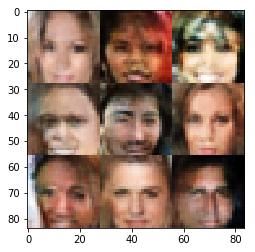

Epoch 1/10... Discriminator Loss: 0.8223... Generator Loss: 1.3214
Epoch 1/10... Discriminator Loss: 0.6772... Generator Loss: 1.8221
Epoch 1/10... Discriminator Loss: 0.8808... Generator Loss: 1.7694
Epoch 1/10... Discriminator Loss: 1.1502... Generator Loss: 0.8998
Epoch 1/10... Discriminator Loss: 0.9119... Generator Loss: 0.7919
Epoch 1/10... Discriminator Loss: 1.0754... Generator Loss: 0.5976
Epoch 1/10... Discriminator Loss: 0.7542... Generator Loss: 1.3097
Epoch 1/10... Discriminator Loss: 0.8247... Generator Loss: 1.0802
Epoch 1/10... Discriminator Loss: 0.7644... Generator Loss: 1.2548
Epoch 1/10... Discriminator Loss: 0.8971... Generator Loss: 1.0329


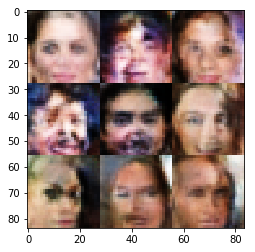

Epoch 1/10... Discriminator Loss: 1.0356... Generator Loss: 0.7251
Epoch 1/10... Discriminator Loss: 0.8418... Generator Loss: 1.4670
Epoch 1/10... Discriminator Loss: 0.7425... Generator Loss: 1.3472
Epoch 1/10... Discriminator Loss: 1.1065... Generator Loss: 0.6083
Epoch 1/10... Discriminator Loss: 1.6953... Generator Loss: 2.2800
Epoch 1/10... Discriminator Loss: 0.8011... Generator Loss: 1.2840
Epoch 1/10... Discriminator Loss: 0.7241... Generator Loss: 1.5272
Epoch 1/10... Discriminator Loss: 0.8832... Generator Loss: 1.0416
Epoch 1/10... Discriminator Loss: 0.5708... Generator Loss: 1.9771
Epoch 1/10... Discriminator Loss: 0.6572... Generator Loss: 1.6463


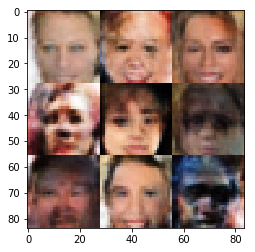

Epoch 1/10... Discriminator Loss: 0.8560... Generator Loss: 1.6659
Epoch 1/10... Discriminator Loss: 1.0409... Generator Loss: 0.7231
Epoch 1/10... Discriminator Loss: 0.9748... Generator Loss: 0.8271
Epoch 1/10... Discriminator Loss: 1.1474... Generator Loss: 0.6523
Epoch 1/10... Discriminator Loss: 0.9988... Generator Loss: 0.8539
Epoch 1/10... Discriminator Loss: 1.2868... Generator Loss: 1.0097
Epoch 1/10... Discriminator Loss: 0.6799... Generator Loss: 1.5430
Epoch 1/10... Discriminator Loss: 1.1173... Generator Loss: 0.6370
Epoch 1/10... Discriminator Loss: 0.9938... Generator Loss: 0.8785
Epoch 1/10... Discriminator Loss: 1.0716... Generator Loss: 0.6752


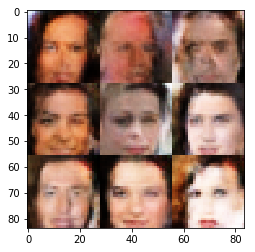

Epoch 1/10... Discriminator Loss: 1.1095... Generator Loss: 0.6814
Epoch 1/10... Discriminator Loss: 0.7051... Generator Loss: 1.2796
Epoch 1/10... Discriminator Loss: 0.9794... Generator Loss: 0.8022
Epoch 1/10... Discriminator Loss: 1.1924... Generator Loss: 0.6081
Epoch 1/10... Discriminator Loss: 0.8705... Generator Loss: 1.1327
Epoch 1/10... Discriminator Loss: 0.7579... Generator Loss: 1.2422
Epoch 1/10... Discriminator Loss: 1.1343... Generator Loss: 0.7243
Epoch 1/10... Discriminator Loss: 0.8695... Generator Loss: 1.2592
Epoch 1/10... Discriminator Loss: 0.7718... Generator Loss: 1.0976
Epoch 1/10... Discriminator Loss: 0.9669... Generator Loss: 0.8094


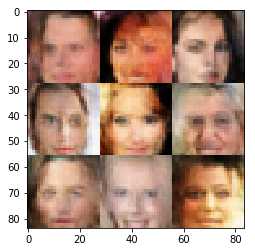

Epoch 1/10... Discriminator Loss: 0.9913... Generator Loss: 1.0356
Epoch 1/10... Discriminator Loss: 1.0735... Generator Loss: 0.6688
Epoch 1/10... Discriminator Loss: 1.0789... Generator Loss: 1.2792
Epoch 1/10... Discriminator Loss: 1.1754... Generator Loss: 0.5704
Epoch 1/10... Discriminator Loss: 0.9216... Generator Loss: 1.4778
Epoch 1/10... Discriminator Loss: 0.8162... Generator Loss: 1.2026
Epoch 1/10... Discriminator Loss: 0.9852... Generator Loss: 0.7335
Epoch 1/10... Discriminator Loss: 0.6747... Generator Loss: 1.5395
Epoch 1/10... Discriminator Loss: 0.6986... Generator Loss: 1.4434
Epoch 1/10... Discriminator Loss: 1.1291... Generator Loss: 0.5242


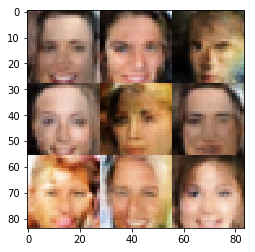

Epoch 1/10... Discriminator Loss: 0.6258... Generator Loss: 1.5556
Epoch 1/10... Discriminator Loss: 1.0800... Generator Loss: 0.6962
Epoch 1/10... Discriminator Loss: 0.8732... Generator Loss: 0.9443
Epoch 1/10... Discriminator Loss: 0.8673... Generator Loss: 0.9570
Epoch 1/10... Discriminator Loss: 1.1556... Generator Loss: 0.5828
Epoch 1/10... Discriminator Loss: 1.1284... Generator Loss: 1.1490
Epoch 1/10... Discriminator Loss: 1.3691... Generator Loss: 0.5530
Epoch 1/10... Discriminator Loss: 1.0198... Generator Loss: 1.1394
Epoch 1/10... Discriminator Loss: 0.9329... Generator Loss: 0.9689
Epoch 1/10... Discriminator Loss: 1.1611... Generator Loss: 0.6010


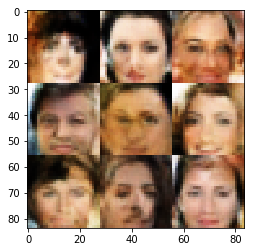

Epoch 1/10... Discriminator Loss: 1.0220... Generator Loss: 1.0079
Epoch 1/10... Discriminator Loss: 1.2859... Generator Loss: 1.3656
Epoch 1/10... Discriminator Loss: 1.0530... Generator Loss: 0.6919
Epoch 1/10... Discriminator Loss: 0.8212... Generator Loss: 1.3799
Epoch 1/10... Discriminator Loss: 1.0054... Generator Loss: 1.2417
Epoch 1/10... Discriminator Loss: 1.0913... Generator Loss: 1.0089
Epoch 1/10... Discriminator Loss: 0.8318... Generator Loss: 1.1216
Epoch 1/10... Discriminator Loss: 0.9168... Generator Loss: 1.0977
Epoch 1/10... Discriminator Loss: 0.8003... Generator Loss: 1.3490
Epoch 1/10... Discriminator Loss: 0.8365... Generator Loss: 1.0585


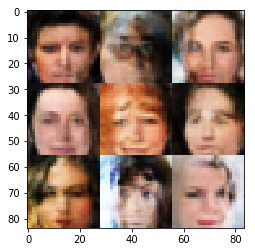

Epoch 1/10... Discriminator Loss: 0.9042... Generator Loss: 0.8456
Epoch 1/10... Discriminator Loss: 0.9414... Generator Loss: 0.8371
Epoch 1/10... Discriminator Loss: 1.0180... Generator Loss: 0.9079
Epoch 1/10... Discriminator Loss: 0.8217... Generator Loss: 1.3988
Epoch 1/10... Discriminator Loss: 0.9958... Generator Loss: 1.0171
Epoch 1/10... Discriminator Loss: 1.2797... Generator Loss: 1.4961
Epoch 1/10... Discriminator Loss: 1.3714... Generator Loss: 0.3867
Epoch 1/10... Discriminator Loss: 0.7713... Generator Loss: 1.4657
Epoch 1/10... Discriminator Loss: 0.8850... Generator Loss: 1.1648
Epoch 1/10... Discriminator Loss: 0.9364... Generator Loss: 0.8887


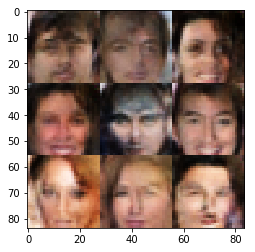

Epoch 1/10... Discriminator Loss: 0.9185... Generator Loss: 1.1499
Epoch 1/10... Discriminator Loss: 1.3869... Generator Loss: 1.9559
Epoch 1/10... Discriminator Loss: 0.8589... Generator Loss: 1.4329
Epoch 1/10... Discriminator Loss: 1.0888... Generator Loss: 0.8395
Epoch 1/10... Discriminator Loss: 1.1547... Generator Loss: 0.7842
Epoch 1/10... Discriminator Loss: 1.1252... Generator Loss: 1.5553
Epoch 1/10... Discriminator Loss: 1.2506... Generator Loss: 0.6656
Epoch 1/10... Discriminator Loss: 1.3325... Generator Loss: 0.5517
Epoch 1/10... Discriminator Loss: 0.6033... Generator Loss: 1.8931
Epoch 1/10... Discriminator Loss: 0.8346... Generator Loss: 1.0120


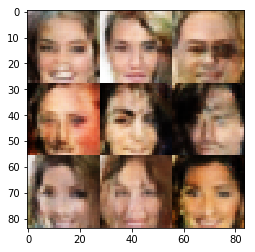

Epoch 1/10... Discriminator Loss: 0.8920... Generator Loss: 1.2063
Epoch 1/10... Discriminator Loss: 1.1382... Generator Loss: 0.5768
Epoch 1/10... Discriminator Loss: 0.7732... Generator Loss: 1.9944
Epoch 1/10... Discriminator Loss: 1.0144... Generator Loss: 1.1148
Epoch 1/10... Discriminator Loss: 1.0817... Generator Loss: 0.6480
Epoch 1/10... Discriminator Loss: 0.8759... Generator Loss: 0.8751
Epoch 1/10... Discriminator Loss: 1.0914... Generator Loss: 0.9108
Epoch 1/10... Discriminator Loss: 1.0609... Generator Loss: 0.7153
Epoch 1/10... Discriminator Loss: 1.2905... Generator Loss: 0.8115
Epoch 1/10... Discriminator Loss: 0.9163... Generator Loss: 0.9186


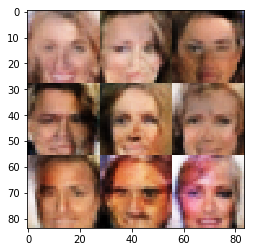

Epoch 1/10... Discriminator Loss: 0.8451... Generator Loss: 1.1263
Epoch 1/10... Discriminator Loss: 0.9658... Generator Loss: 0.8785
Epoch 1/10... Discriminator Loss: 1.1875... Generator Loss: 0.6000
Epoch 1/10... Discriminator Loss: 0.9713... Generator Loss: 0.8212
Epoch 1/10... Discriminator Loss: 0.9401... Generator Loss: 0.8244
Epoch 1/10... Discriminator Loss: 0.8729... Generator Loss: 1.2559
Epoch 1/10... Discriminator Loss: 1.1585... Generator Loss: 0.6698
Epoch 1/10... Discriminator Loss: 0.8441... Generator Loss: 1.0085
Epoch 1/10... Discriminator Loss: 1.3340... Generator Loss: 0.4383
Epoch 1/10... Discriminator Loss: 0.8161... Generator Loss: 1.2009


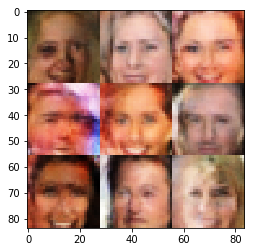

Epoch 1/10... Discriminator Loss: 0.9834... Generator Loss: 0.7486
Epoch 1/10... Discriminator Loss: 1.3024... Generator Loss: 2.0731
Epoch 1/10... Discriminator Loss: 1.3053... Generator Loss: 0.4852
Epoch 1/10... Discriminator Loss: 1.3288... Generator Loss: 0.7580
Epoch 1/10... Discriminator Loss: 0.9694... Generator Loss: 1.4118
Epoch 1/10... Discriminator Loss: 1.0093... Generator Loss: 0.8153
Epoch 1/10... Discriminator Loss: 0.8162... Generator Loss: 1.0602
Epoch 1/10... Discriminator Loss: 1.0270... Generator Loss: 1.2927
Epoch 1/10... Discriminator Loss: 1.1696... Generator Loss: 0.7339
Epoch 1/10... Discriminator Loss: 1.0598... Generator Loss: 0.6640


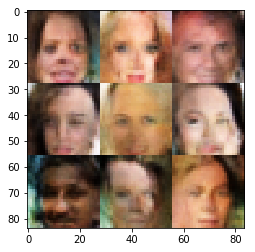

Epoch 1/10... Discriminator Loss: 1.0539... Generator Loss: 0.8608
Epoch 1/10... Discriminator Loss: 1.2522... Generator Loss: 0.5023
Epoch 1/10... Discriminator Loss: 0.8825... Generator Loss: 0.9367
Epoch 1/10... Discriminator Loss: 1.2015... Generator Loss: 1.6889
Epoch 1/10... Discriminator Loss: 1.0807... Generator Loss: 1.2271
Epoch 1/10... Discriminator Loss: 1.0142... Generator Loss: 1.3281
Epoch 1/10... Discriminator Loss: 0.5544... Generator Loss: 1.9643
Epoch 1/10... Discriminator Loss: 0.8985... Generator Loss: 0.9630
Epoch 1/10... Discriminator Loss: 1.0108... Generator Loss: 1.0671
Epoch 1/10... Discriminator Loss: 0.8955... Generator Loss: 0.7991


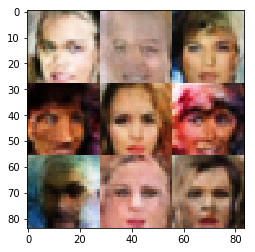

Epoch 1/10... Discriminator Loss: 1.1465... Generator Loss: 0.5709
Epoch 1/10... Discriminator Loss: 0.9656... Generator Loss: 1.1046
Epoch 1/10... Discriminator Loss: 0.8877... Generator Loss: 0.9536
Epoch 1/10... Discriminator Loss: 1.1099... Generator Loss: 0.7554
Epoch 1/10... Discriminator Loss: 0.8746... Generator Loss: 0.8776
Epoch 1/10... Discriminator Loss: 1.2144... Generator Loss: 0.6348
Epoch 1/10... Discriminator Loss: 0.9670... Generator Loss: 0.8700
Epoch 1/10... Discriminator Loss: 1.0065... Generator Loss: 0.8355
Epoch 1/10... Discriminator Loss: 0.6848... Generator Loss: 1.3027
Epoch 1/10... Discriminator Loss: 1.1598... Generator Loss: 0.6990


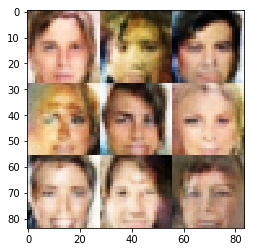

Epoch 1/10... Discriminator Loss: 1.0318... Generator Loss: 0.7689
Epoch 1/10... Discriminator Loss: 0.8970... Generator Loss: 1.0828
Epoch 1/10... Discriminator Loss: 1.2545... Generator Loss: 0.5330
Epoch 1/10... Discriminator Loss: 1.2287... Generator Loss: 0.5512
Epoch 1/10... Discriminator Loss: 0.9839... Generator Loss: 0.8610
Epoch 1/10... Discriminator Loss: 1.2957... Generator Loss: 0.6559
Epoch 1/10... Discriminator Loss: 1.4239... Generator Loss: 0.3915
Epoch 1/10... Discriminator Loss: 0.9422... Generator Loss: 1.3484
Epoch 1/10... Discriminator Loss: 1.3523... Generator Loss: 0.5375
Epoch 1/10... Discriminator Loss: 1.2986... Generator Loss: 0.5880


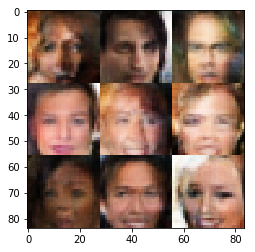

Epoch 1/10... Discriminator Loss: 1.0282... Generator Loss: 1.5472
Epoch 1/10... Discriminator Loss: 0.9225... Generator Loss: 1.0147
Epoch 1/10... Discriminator Loss: 1.0714... Generator Loss: 0.6428
Epoch 1/10... Discriminator Loss: 1.1283... Generator Loss: 0.8418
Epoch 1/10... Discriminator Loss: 1.1656... Generator Loss: 0.6778
Epoch 1/10... Discriminator Loss: 1.0707... Generator Loss: 0.9522
Epoch 1/10... Discriminator Loss: 0.8954... Generator Loss: 1.0691
Epoch 1/10... Discriminator Loss: 0.8382... Generator Loss: 1.4022
Epoch 1/10... Discriminator Loss: 1.1293... Generator Loss: 1.4525
Epoch 1/10... Discriminator Loss: 0.9600... Generator Loss: 0.9653


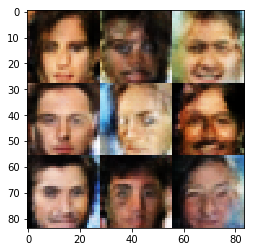

Epoch 1/10... Discriminator Loss: 0.8111... Generator Loss: 1.4555
Epoch 1/10... Discriminator Loss: 1.1312... Generator Loss: 0.5763
Epoch 1/10... Discriminator Loss: 1.0274... Generator Loss: 0.7983
Epoch 1/10... Discriminator Loss: 1.1231... Generator Loss: 0.6867
Epoch 1/10... Discriminator Loss: 1.1957... Generator Loss: 0.7501
Epoch 1/10... Discriminator Loss: 1.0384... Generator Loss: 0.7441
Epoch 1/10... Discriminator Loss: 0.8871... Generator Loss: 0.8284
Epoch 1/10... Discriminator Loss: 0.9764... Generator Loss: 0.7263
Epoch 1/10... Discriminator Loss: 1.0715... Generator Loss: 0.6284
Epoch 1/10... Discriminator Loss: 0.8432... Generator Loss: 1.6027


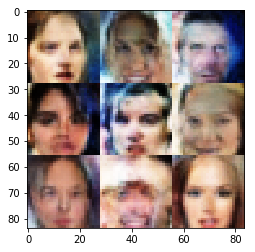

Epoch 1/10... Discriminator Loss: 0.9550... Generator Loss: 0.9391
Epoch 1/10... Discriminator Loss: 0.6777... Generator Loss: 1.6035
Epoch 1/10... Discriminator Loss: 0.7769... Generator Loss: 1.1787
Epoch 1/10... Discriminator Loss: 1.0735... Generator Loss: 1.0168
Epoch 1/10... Discriminator Loss: 0.9744... Generator Loss: 1.1695
Epoch 1/10... Discriminator Loss: 1.5032... Generator Loss: 0.6925
Epoch 1/10... Discriminator Loss: 1.0212... Generator Loss: 0.8839
Epoch 1/10... Discriminator Loss: 0.9794... Generator Loss: 0.9885
Epoch 1/10... Discriminator Loss: 1.2290... Generator Loss: 0.4790
Epoch 1/10... Discriminator Loss: 1.3969... Generator Loss: 0.4088


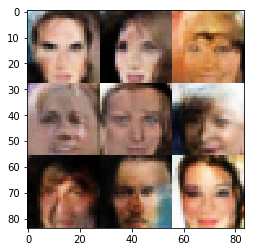

Epoch 1/10... Discriminator Loss: 1.0006... Generator Loss: 0.7923
Epoch 1/10... Discriminator Loss: 0.9514... Generator Loss: 1.1005
Epoch 1/10... Discriminator Loss: 0.8818... Generator Loss: 0.8949
Epoch 1/10... Discriminator Loss: 1.5018... Generator Loss: 0.4627
Epoch 1/10... Discriminator Loss: 1.1022... Generator Loss: 1.2496
Epoch 1/10... Discriminator Loss: 0.9508... Generator Loss: 1.5965
Epoch 1/10... Discriminator Loss: 1.0480... Generator Loss: 0.7587
Epoch 1/10... Discriminator Loss: 1.1498... Generator Loss: 0.6823
Epoch 1/10... Discriminator Loss: 1.2641... Generator Loss: 0.5452
Epoch 1/10... Discriminator Loss: 1.0053... Generator Loss: 0.7417


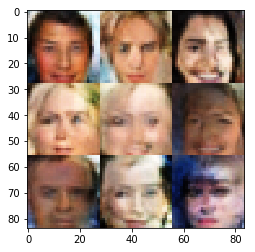

Epoch 1/10... Discriminator Loss: 1.3405... Generator Loss: 0.4342
Epoch 1/10... Discriminator Loss: 1.1194... Generator Loss: 0.6166
Epoch 1/10... Discriminator Loss: 1.0811... Generator Loss: 0.9127
Epoch 1/10... Discriminator Loss: 0.9573... Generator Loss: 0.8090
Epoch 1/10... Discriminator Loss: 1.0364... Generator Loss: 0.6725
Epoch 1/10... Discriminator Loss: 0.9819... Generator Loss: 0.8228
Epoch 1/10... Discriminator Loss: 0.7876... Generator Loss: 1.4092
Epoch 1/10... Discriminator Loss: 0.9594... Generator Loss: 0.7967
Epoch 1/10... Discriminator Loss: 1.1281... Generator Loss: 0.8953
Epoch 1/10... Discriminator Loss: 0.9648... Generator Loss: 0.7564


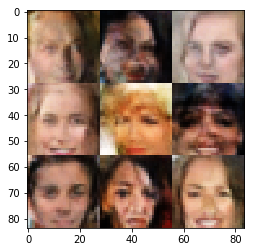

Epoch 1/10... Discriminator Loss: 0.8240... Generator Loss: 1.4667
Epoch 1/10... Discriminator Loss: 1.2149... Generator Loss: 0.6286
Epoch 1/10... Discriminator Loss: 0.9613... Generator Loss: 1.5245
Epoch 1/10... Discriminator Loss: 1.0073... Generator Loss: 1.0149
Epoch 1/10... Discriminator Loss: 1.2069... Generator Loss: 0.8078
Epoch 1/10... Discriminator Loss: 1.2259... Generator Loss: 0.8365
Epoch 1/10... Discriminator Loss: 1.0361... Generator Loss: 0.7027
Epoch 1/10... Discriminator Loss: 0.8294... Generator Loss: 2.0132
Epoch 1/10... Discriminator Loss: 1.3525... Generator Loss: 0.4422
Epoch 2/10... Discriminator Loss: 0.8252... Generator Loss: 2.0722


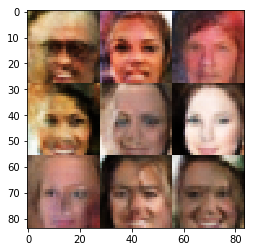

Epoch 2/10... Discriminator Loss: 1.0412... Generator Loss: 0.8381
Epoch 2/10... Discriminator Loss: 1.0568... Generator Loss: 0.9893
Epoch 2/10... Discriminator Loss: 0.9639... Generator Loss: 2.1152
Epoch 2/10... Discriminator Loss: 1.0343... Generator Loss: 1.0898
Epoch 2/10... Discriminator Loss: 1.0432... Generator Loss: 0.9479
Epoch 2/10... Discriminator Loss: 1.2933... Generator Loss: 0.6427
Epoch 2/10... Discriminator Loss: 0.9887... Generator Loss: 0.8232
Epoch 2/10... Discriminator Loss: 1.0293... Generator Loss: 1.2887
Epoch 2/10... Discriminator Loss: 0.9512... Generator Loss: 0.7353
Epoch 2/10... Discriminator Loss: 0.7289... Generator Loss: 1.4121


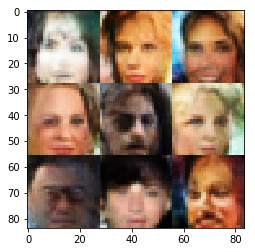

Epoch 2/10... Discriminator Loss: 0.8027... Generator Loss: 0.9786
Epoch 2/10... Discriminator Loss: 1.0492... Generator Loss: 1.4889
Epoch 2/10... Discriminator Loss: 0.9022... Generator Loss: 1.2541
Epoch 2/10... Discriminator Loss: 0.6946... Generator Loss: 1.4728
Epoch 2/10... Discriminator Loss: 1.0110... Generator Loss: 0.7018
Epoch 2/10... Discriminator Loss: 1.1525... Generator Loss: 0.5914
Epoch 2/10... Discriminator Loss: 1.0299... Generator Loss: 0.9781
Epoch 2/10... Discriminator Loss: 1.0264... Generator Loss: 1.0195
Epoch 2/10... Discriminator Loss: 0.8811... Generator Loss: 1.5867
Epoch 2/10... Discriminator Loss: 1.3494... Generator Loss: 1.3966


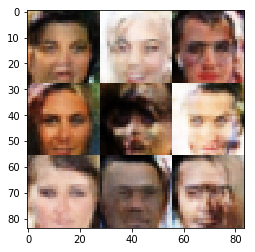

Epoch 2/10... Discriminator Loss: 0.8998... Generator Loss: 1.3881
Epoch 2/10... Discriminator Loss: 1.2095... Generator Loss: 0.6006
Epoch 2/10... Discriminator Loss: 0.9882... Generator Loss: 0.6904
Epoch 2/10... Discriminator Loss: 1.1889... Generator Loss: 0.6466
Epoch 2/10... Discriminator Loss: 1.0394... Generator Loss: 0.8825
Epoch 2/10... Discriminator Loss: 1.1161... Generator Loss: 0.6758
Epoch 2/10... Discriminator Loss: 0.7909... Generator Loss: 1.4204
Epoch 2/10... Discriminator Loss: 1.0948... Generator Loss: 0.8920
Epoch 2/10... Discriminator Loss: 1.2642... Generator Loss: 0.5685
Epoch 2/10... Discriminator Loss: 1.2770... Generator Loss: 0.4954


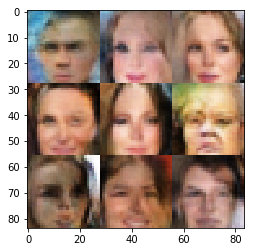

Epoch 2/10... Discriminator Loss: 0.6897... Generator Loss: 1.4537
Epoch 2/10... Discriminator Loss: 1.1635... Generator Loss: 1.0008
Epoch 2/10... Discriminator Loss: 0.9150... Generator Loss: 0.9699
Epoch 2/10... Discriminator Loss: 0.7948... Generator Loss: 1.1378
Epoch 2/10... Discriminator Loss: 1.1052... Generator Loss: 0.6635
Epoch 2/10... Discriminator Loss: 1.0349... Generator Loss: 0.8215
Epoch 2/10... Discriminator Loss: 1.4067... Generator Loss: 0.4345
Epoch 2/10... Discriminator Loss: 1.0988... Generator Loss: 0.8104
Epoch 2/10... Discriminator Loss: 1.1434... Generator Loss: 0.9853
Epoch 2/10... Discriminator Loss: 0.9784... Generator Loss: 0.9673


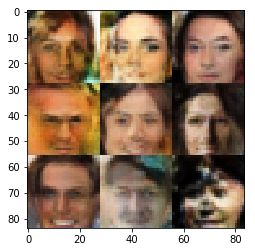

Epoch 2/10... Discriminator Loss: 1.0351... Generator Loss: 1.0132
Epoch 2/10... Discriminator Loss: 0.8647... Generator Loss: 1.3591
Epoch 2/10... Discriminator Loss: 1.1977... Generator Loss: 0.9219
Epoch 2/10... Discriminator Loss: 1.0611... Generator Loss: 0.7295
Epoch 2/10... Discriminator Loss: 1.2221... Generator Loss: 0.6065
Epoch 2/10... Discriminator Loss: 0.9244... Generator Loss: 1.2042
Epoch 2/10... Discriminator Loss: 0.9193... Generator Loss: 1.4226
Epoch 2/10... Discriminator Loss: 0.7112... Generator Loss: 1.6012
Epoch 2/10... Discriminator Loss: 0.9772... Generator Loss: 0.7916
Epoch 2/10... Discriminator Loss: 1.0488... Generator Loss: 0.9387


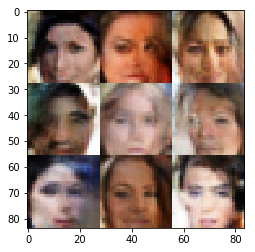

Epoch 2/10... Discriminator Loss: 0.8028... Generator Loss: 1.5507
Epoch 2/10... Discriminator Loss: 1.1754... Generator Loss: 0.5694
Epoch 2/10... Discriminator Loss: 0.8920... Generator Loss: 0.8726
Epoch 2/10... Discriminator Loss: 1.1768... Generator Loss: 2.0474
Epoch 2/10... Discriminator Loss: 1.2663... Generator Loss: 0.5440
Epoch 2/10... Discriminator Loss: 1.0127... Generator Loss: 0.8230
Epoch 2/10... Discriminator Loss: 0.8926... Generator Loss: 1.6454
Epoch 2/10... Discriminator Loss: 1.4757... Generator Loss: 0.4066
Epoch 2/10... Discriminator Loss: 1.2303... Generator Loss: 0.6690
Epoch 2/10... Discriminator Loss: 1.2150... Generator Loss: 0.7948


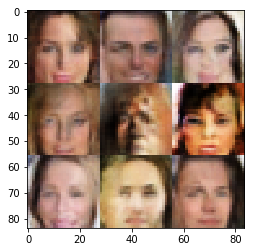

Epoch 2/10... Discriminator Loss: 1.1086... Generator Loss: 0.7423
Epoch 2/10... Discriminator Loss: 1.1169... Generator Loss: 0.6426
Epoch 2/10... Discriminator Loss: 1.0074... Generator Loss: 1.0992
Epoch 2/10... Discriminator Loss: 0.9887... Generator Loss: 1.0378
Epoch 2/10... Discriminator Loss: 1.1697... Generator Loss: 0.7421
Epoch 2/10... Discriminator Loss: 1.1281... Generator Loss: 0.6331
Epoch 2/10... Discriminator Loss: 1.2339... Generator Loss: 0.6700
Epoch 2/10... Discriminator Loss: 1.6890... Generator Loss: 0.3755
Epoch 2/10... Discriminator Loss: 1.0319... Generator Loss: 1.0683
Epoch 2/10... Discriminator Loss: 1.0019... Generator Loss: 0.8679


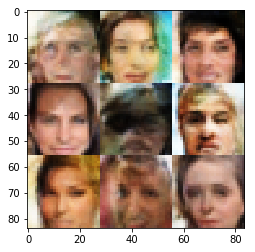

Epoch 2/10... Discriminator Loss: 1.0976... Generator Loss: 0.6930
Epoch 2/10... Discriminator Loss: 1.0585... Generator Loss: 0.6619
Epoch 2/10... Discriminator Loss: 0.7868... Generator Loss: 1.3184
Epoch 2/10... Discriminator Loss: 0.9908... Generator Loss: 1.0036
Epoch 2/10... Discriminator Loss: 0.9740... Generator Loss: 0.9185
Epoch 2/10... Discriminator Loss: 0.8905... Generator Loss: 1.0766
Epoch 2/10... Discriminator Loss: 1.0157... Generator Loss: 1.3470
Epoch 2/10... Discriminator Loss: 0.8635... Generator Loss: 1.2984
Epoch 2/10... Discriminator Loss: 0.9318... Generator Loss: 0.7437
Epoch 2/10... Discriminator Loss: 1.1045... Generator Loss: 0.6177


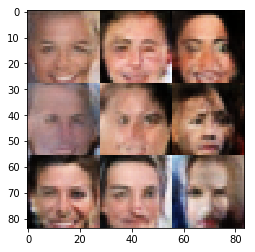

Epoch 2/10... Discriminator Loss: 0.9701... Generator Loss: 1.0009
Epoch 2/10... Discriminator Loss: 1.0914... Generator Loss: 0.5623
Epoch 2/10... Discriminator Loss: 1.0191... Generator Loss: 0.7738
Epoch 2/10... Discriminator Loss: 1.1473... Generator Loss: 0.5821
Epoch 2/10... Discriminator Loss: 1.0858... Generator Loss: 1.1326
Epoch 2/10... Discriminator Loss: 0.9885... Generator Loss: 1.0344
Epoch 2/10... Discriminator Loss: 0.9594... Generator Loss: 1.0464
Epoch 2/10... Discriminator Loss: 1.0928... Generator Loss: 1.1019
Epoch 2/10... Discriminator Loss: 0.9889... Generator Loss: 1.0123
Epoch 2/10... Discriminator Loss: 1.1337... Generator Loss: 0.6708


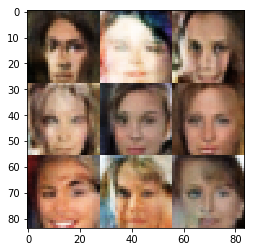

Epoch 2/10... Discriminator Loss: 1.3721... Generator Loss: 0.6781
Epoch 2/10... Discriminator Loss: 1.0108... Generator Loss: 0.8622
Epoch 2/10... Discriminator Loss: 1.3072... Generator Loss: 0.6630
Epoch 2/10... Discriminator Loss: 1.1171... Generator Loss: 0.6843
Epoch 2/10... Discriminator Loss: 0.9852... Generator Loss: 0.7193
Epoch 2/10... Discriminator Loss: 1.4344... Generator Loss: 0.6735
Epoch 2/10... Discriminator Loss: 1.0721... Generator Loss: 0.7941
Epoch 2/10... Discriminator Loss: 0.5541... Generator Loss: 1.7027
Epoch 2/10... Discriminator Loss: 1.0799... Generator Loss: 0.8234
Epoch 2/10... Discriminator Loss: 0.7984... Generator Loss: 1.9792


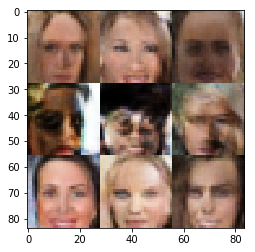

Epoch 2/10... Discriminator Loss: 1.3279... Generator Loss: 0.5704
Epoch 2/10... Discriminator Loss: 1.3003... Generator Loss: 0.5319
Epoch 2/10... Discriminator Loss: 0.7574... Generator Loss: 1.3098
Epoch 2/10... Discriminator Loss: 1.2132... Generator Loss: 1.1010
Epoch 2/10... Discriminator Loss: 1.4680... Generator Loss: 0.3823
Epoch 2/10... Discriminator Loss: 1.3182... Generator Loss: 0.4648
Epoch 2/10... Discriminator Loss: 1.0348... Generator Loss: 0.9162
Epoch 2/10... Discriminator Loss: 1.2565... Generator Loss: 0.6794
Epoch 2/10... Discriminator Loss: 0.9100... Generator Loss: 1.0430
Epoch 2/10... Discriminator Loss: 1.1067... Generator Loss: 1.3808


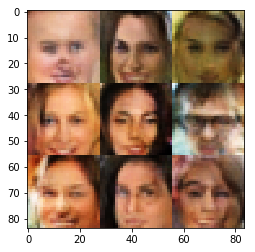

Epoch 2/10... Discriminator Loss: 1.0476... Generator Loss: 0.7913
Epoch 2/10... Discriminator Loss: 1.3051... Generator Loss: 0.6080
Epoch 2/10... Discriminator Loss: 1.1067... Generator Loss: 1.0938
Epoch 2/10... Discriminator Loss: 0.8740... Generator Loss: 1.0643


KeyboardInterrupt: 

In [22]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。